In [1]:
#importing packages
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import cv2
import random
import pandas as pd

Please enter the full path to the file E:\STUDY\SEM 8\CE 716\Mini project\L1C_T43QHV_A024898_20200329T051221.tif
Press Enter to start preprocessing...
Please wait while preprocessing is done
Prepocessing completed
The input image is being displayed. Please wait...


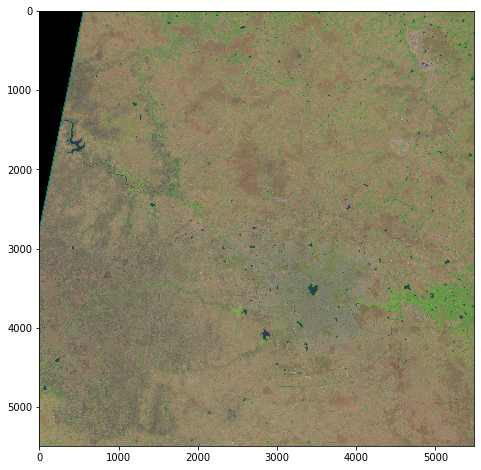

In [57]:
#filepath
#filepath = r"E:\STUDY\SEM 8\CE 716\Mini project\L1C_T43QHV_A024898_20200329T051221.tif"
filepath = input("Please enter the full path to the file ")
#preprocessing is carried out
input("Press Enter to start preprocessing...")
print("Please wait while preprocessing is done")
raster = gdal.Open(filepath)
rows=raster.RasterXSize
cols=raster.RasterYSize
bands=raster.RasterCount
rows, cols, bands
band1=raster.GetRasterBand(1).ReadAsArray()
band2=raster.GetRasterBand(2).ReadAsArray()
band3=raster.GetRasterBand(3).ReadAsArray()
merged=np.dstack((band1,band2,band3))
merged=merged/255
print("Prepocessing completed")
print("The input image is being displayed. Please wait...")
plt.figure(figsize=(12,8))
plt.imshow(merged)

In [58]:
#K Means code
clusters = int(input("Enter the cluster value: "))
iterations = int(input("Enter number of iterations: "))

Enter the cluster value: 7
Enter number of iterations: 3


Press Enter to start KMeans processing...
Doing random initialisation
Random (row,col) is (1866,2030) for cluster:0
Random (row,col) is (1189,1699) for cluster:1
Random (row,col) is (4239,5425) for cluster:2
Random (row,col) is (281,386) for cluster:3
Random (row,col) is (400,2512) for cluster:4
Random (row,col) is (897,1752) for cluster:5
Random (row,col) is (716,946) for cluster:6
Random initialisation done. Now will start the computation
Press Enter to continue...
Starting iteration number:1
Will keep on displaying when rows=cols and multiples of 500
Press Enter to continue...
Completed (row,col)=(0,0)
Total (rows,cols) are (5490,5490)
 
Completed (row,col)=(500,500)
Total (rows,cols) are (5490,5490)
 
Completed (row,col)=(1000,1000)
Total (rows,cols) are (5490,5490)
 
Completed (row,col)=(1500,1500)
Total (rows,cols) are (5490,5490)
 
Completed (row,col)=(2000,2000)
Total (rows,cols) are (5490,5490)
 
Completed (row,col)=(2500,2500)
Total (rows,cols) are (5490,5490)
 
Completed (ro

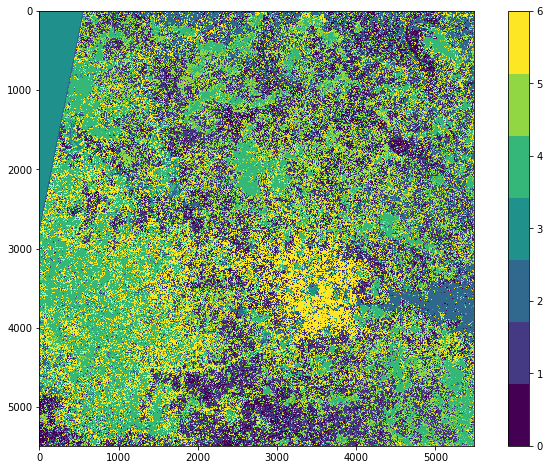

Press Y for next iteration or N to exit: Y
Updating mean for next iteration
Starting iteration number:2
Will keep on displaying when rows=cols and multiples of 500
Press Enter to continue...
Completed (row,col)=(0,0)
Total (rows,cols) are (5490,5490)
 
Completed (row,col)=(500,500)
Total (rows,cols) are (5490,5490)
 
Completed (row,col)=(1000,1000)
Total (rows,cols) are (5490,5490)
 
Completed (row,col)=(1500,1500)
Total (rows,cols) are (5490,5490)
 
Completed (row,col)=(2000,2000)
Total (rows,cols) are (5490,5490)
 
Completed (row,col)=(2500,2500)
Total (rows,cols) are (5490,5490)
 
Completed (row,col)=(3000,3000)
Total (rows,cols) are (5490,5490)
 
Completed (row,col)=(3500,3500)
Total (rows,cols) are (5490,5490)
 
Completed (row,col)=(4000,4000)
Total (rows,cols) are (5490,5490)
 
Completed (row,col)=(4500,4500)
Total (rows,cols) are (5490,5490)
 
Completed (row,col)=(5000,5000)
Total (rows,cols) are (5490,5490)
 
Cluster allotment completed. The current classification is as follows

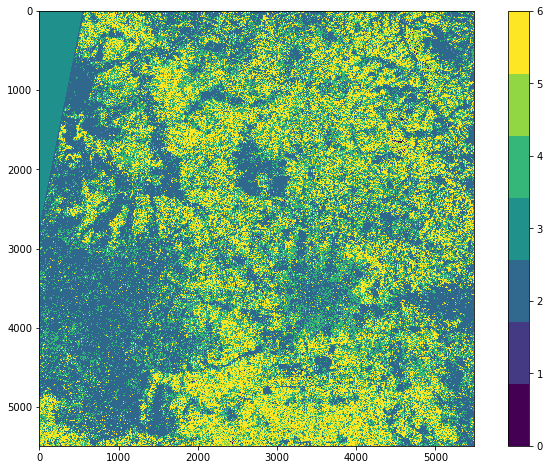

Press Y for next iteration or N to exit: N
All iterations are completed.
Press Enter to display the final result...


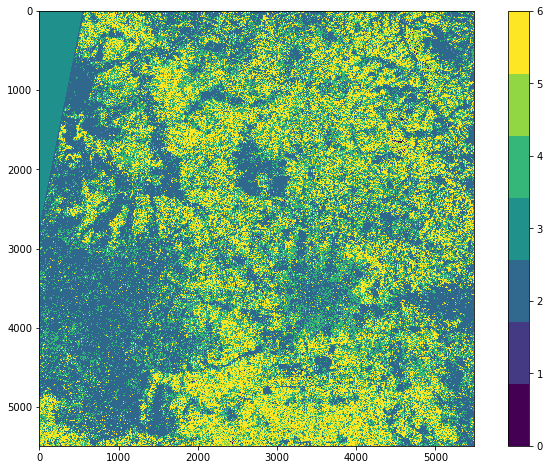

In [59]:
input("Press Enter to start KMeans processing...")
meanvalues=[]
count=1
pixelcluster=np.zeros((rows,cols), dtype=int)
pixelclustercount=np.zeros(clusters, dtype=int)
cmap = plt.get_cmap(lut=clusters)
#random initial mean
print("Doing random initialisation")
for i in range(0,clusters):
    r=random.randint(0,rows-1)      #randint is inclusive of both the parameters
    c=random.randint(0,cols-1)      
    print("Random (row,col) is ("+str(r)+","+str(c)+")" + " for cluster:"+str(i))
    bandval=[]
    bandval.append(merged[r][c][0])
    bandval.append(merged[r][c][1])
    bandval.append(merged[r][c][2])
    meanvalues.append(bandval)
print("Random initialisation done. Now will start the computation")
input("Press Enter to continue...")
while(count<=iterations):
    print("Starting iteration number:"+str(count))
    print("Will keep on displaying when rows=cols and multiples of 500")
    input("Press Enter to continue...")
    
    #Making pixelcluster count to 0
    for temp in range(clusters):
        pixelclustercount[temp] = 0
    
    summean=[] #to store sum of all clusters alloted and then find new mean
#fill summean with 0 values
    for i in range(0,clusters):
        temp=[0,0,0]
        summean.append(temp)
        
    for i in range(0,rows):
        for j in range(0,cols):
            if i==j and i%500==0:
                print("Completed (row,col)=("+str(i)+","+str(j)+")")
                print("Total (rows,cols) are ("+str(rows)+","+str(cols)+")")
                print(" ")
            distance=[]
            coordinate=[]
            coordinate.append(merged[i][j][0])
            coordinate.append(merged[i][j][1])
            coordinate.append(merged[i][j][2])
            for k in range(0,clusters):
                clustermean=meanvalues[k]
                diffsquaresum=0
                diffsquaresum=((coordinate[0]-clustermean[0])**2)+((coordinate[1]-clustermean[1])**2)+((coordinate[2]-clustermean[2])**2)
                distance.append(math.sqrt(diffsquaresum))
            mindistance=min(distance)
            indexval=distance.index(mindistance)
            pixelcluster[i][j]=indexval
            pixelclustercount[indexval]=pixelclustercount[indexval]+1
            
            clusternum=pixelcluster[i][j]
            summean[clusternum][0]=summean[clusternum][0]+merged[i][j][0]
            summean[clusternum][1]=summean[clusternum][0]+merged[i][j][1]
            summean[clusternum][2]=summean[clusternum][0]+merged[i][j][2]
            
#new mean calculation
    print("Cluster allotment completed. The current classification is as follows")
    fig = plt.figure(figsize=(12,8))
    cax = plt.imshow(pixelcluster, cmap=cmap)
    fig.colorbar(cax)
    plt.show()
    choice = input("Press Y for next iteration or N to exit: ")
    if choice=='N':
        break
    else:
        print("Updating mean for next iteration")
        
    for i in range(0,clusters):
        meanvalues[i][0]=summean[i][0]/pixelclustercount[i]
        meanvalues[i][1]=summean[i][1]/pixelclustercount[i]
        meanvalues[i][2]=summean[i][2]/pixelclustercount[i]
    count=count+1
print("All iterations are completed.")
input("Press Enter to display the final result...")
fig = plt.figure(figsize=(12,8))
cax = plt.imshow(pixelcluster, cmap=cmap)
fig.colorbar(cax)
plt.show()

In [60]:
#Statistics calculation
totalpixelcount = rows*cols
cluster_statistics = pd.DataFrame(columns=['ClusterNum', 'PixelCount', 'Percent Area(%)'],index=list(range(0,clusters)))
for i in range(0, clusters):
    pixelcount = pixelclustercount[i]
    percent_area = (pixelcount/totalpixelcount)*100
    percent_area = round(percent_area,ndigits=2)
    cluster_statistics.iloc[i] = [i, pixelcount, percent_area]

In [61]:
cluster_statistics

,ClusterNum,PixelCount,Percent Area(%)
0,0,21097,0.07
1,1,43247,0.14
2,2,12295404,40.79
3,3,762023,2.53
4,4,9141346,30.33
5,5,959455,3.18
6,6,6917528,22.95


In [46]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("Mall_Customers.csv")

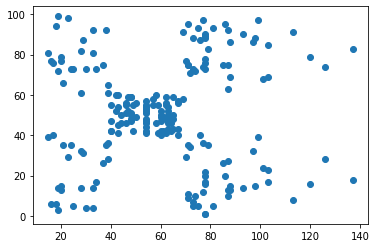

In [48]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])

In [49]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].to_numpy()

In [50]:
kmeans = KMeans(n_clusters=5)

In [51]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
y_pred = kmeans.predict(X)

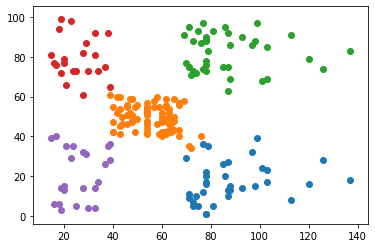

In [57]:
cmap = plt.get_cmap(lut=5)
for i in u_labels:
    plt.scatter(X[y_pred == i , 0] , X[y_pred == i , 1] , cmap=cmap)
plt.show()